In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import csv

In [2]:
with np.load('dataset10000.npz') as data:
    x_data,y_data = data['x'],data['y']

In [3]:
# def NormalizeData(data):
#     with open('minmax.csv', 'w') as f:
#         writer = csv.writer(f)
#         writer.writerow([np.min(data),np.max(data)])
#     return (data - np.min(data)) / (np.max(data) - np.min(data))

In [4]:
# x_data = NormalizeData(x_data)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_5 (Normalizati (None, 18)                37        
_________________________________________________________________
dense_19 (Dense)             (None, 40)                760       
_________________________________________________________________
dense_20 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_21 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 168       
Total params: 2,815
Trainable params: 2,778
Non-trainable params: 37
_________________________________________________________________
None
Epoch 1/200
1600/1600 [==============================] - 3s 2ms/step - loss: 1.0888 - accuracy: 0.1624 - val_los

1600/1600 [==============================] - 2s 2ms/step - loss: 0.8293 - accuracy: 0.1698 - val_loss: 0.8359 - val_accuracy: 0.1835
Epoch 51/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.8291 - accuracy: 0.1692 - val_loss: 0.8358 - val_accuracy: 0.1840
Epoch 52/200
1600/1600 [==============================] - 2s 2ms/step - loss: 0.8289 - accuracy: 0.1688 - val_loss: 0.8356 - val_accuracy: 0.1845
Epoch 53/200
1600/1600 [==============================] - 3s 2ms/step - loss: 0.8287 - accuracy: 0.1692 - val_loss: 0.8355 - val_accuracy: 0.1825
Epoch 54/200
1600/1600 [==============================] - 3s 2ms/step - loss: 0.8285 - accuracy: 0.1694 - val_loss: 0.8354 - val_accuracy: 0.1820
Epoch 55/200
1600/1600 [==============================] - 2s 2ms/step - loss: 0.8283 - accuracy: 0.1695 - val_loss: 0.8353 - val_accuracy: 0.1840
Epoch 56/200
1600/1600 [==============================] - 2s 2ms/step - loss: 0.8281 - accuracy: 0.1694 - val_loss: 0.8352 - val_accuracy

1600/1600 [==============================] - 3s 2ms/step - loss: 0.8222 - accuracy: 0.1746 - val_loss: 0.8326 - val_accuracy: 0.1855
Epoch 107/200
1600/1600 [==============================] - 3s 2ms/step - loss: 0.8221 - accuracy: 0.1746 - val_loss: 0.8326 - val_accuracy: 0.1845
Epoch 108/200
1600/1600 [==============================] - 3s 2ms/step - loss: 0.8220 - accuracy: 0.1762 - val_loss: 0.8325 - val_accuracy: 0.1845
Epoch 109/200
1600/1600 [==============================] - 3s 2ms/step - loss: 0.8220 - accuracy: 0.1758 - val_loss: 0.8325 - val_accuracy: 0.1850
Epoch 110/200
1600/1600 [==============================] - 2s 2ms/step - loss: 0.8219 - accuracy: 0.1748 - val_loss: 0.8325 - val_accuracy: 0.1850
Epoch 111/200
1600/1600 [==============================] - 3s 2ms/step - loss: 0.8218 - accuracy: 0.1743 - val_loss: 0.8325 - val_accuracy: 0.1860
Epoch 112/200
1600/1600 [==============================] - 3s 2ms/step - loss: 0.8217 - accuracy: 0.1748 - val_loss: 0.8325 - val_ac

Epoch 162/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.8187 - accuracy: 0.1750 - val_loss: 0.8318 - val_accuracy: 0.1890
Epoch 163/200
1600/1600 [==============================] - 2s 2ms/step - loss: 0.8186 - accuracy: 0.1743 - val_loss: 0.8318 - val_accuracy: 0.1895
Epoch 164/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.8186 - accuracy: 0.1745 - val_loss: 0.8318 - val_accuracy: 0.1900
Epoch 165/200
1600/1600 [==============================] - 2s 2ms/step - loss: 0.8185 - accuracy: 0.1750 - val_loss: 0.8318 - val_accuracy: 0.1905
Epoch 166/200
1600/1600 [==============================] - 3s 2ms/step - loss: 0.8185 - accuracy: 0.1741 - val_loss: 0.8318 - val_accuracy: 0.1900
Epoch 167/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.8184 - accuracy: 0.1740 - val_loss: 0.8318 - val_accuracy: 0.1895
Epoch 168/200
1600/1600 [==============================] - 2s 1ms/step - loss: 0.8184 - accuracy: 0.1752 - val_loss: 0

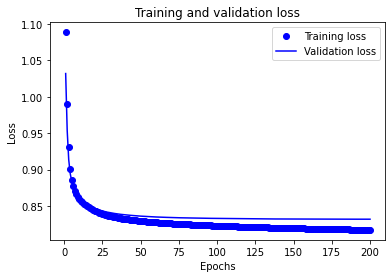

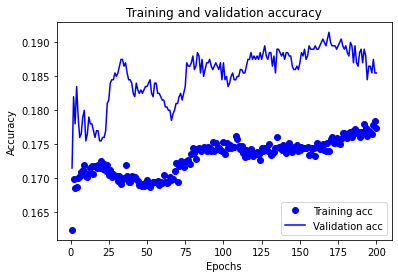

In [10]:

normLayer = keras.layers.experimental.preprocessing.Normalization()
normLayer.adapt(x_train)


model = Sequential([
                normLayer,
                Dense(40, input_shape = (18,), activation='relu'),
                Dense(30, activation='relu'),
                Dense(20, activation='relu'),
                Dense(8, activation='linear'),

])

print(model.summary())


model.compile(loss="mse", optimizer = keras.optimizers.Adam(learning_rate=1e-5), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 200, batch_size = 5 , validation_data = (x_test, y_test))

history_dict = history.history
history_dict.keys()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [11]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets
